# Introduction

In [59]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [60]:
# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10_000)

In [61]:
# Print dataset details
print(f"Training samples: {len(train_data)}, Test samples: {len(test_data)}")
print(f"Number of classes: {np.max(train_labels) + 1}") 

Training samples: 8982, Test samples: 2246
Number of classes: 46


In [62]:
# Decode a sample article
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

print("\nSample article (decoded):\n", decoded_review)


Sample article (decoded):
 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [63]:
# Pad sequences to ensure uniform length
max_length = 300  # Truncate or pad to 300 words
train_data = pad_sequences(train_data, maxlen=max_length, padding="post")
test_data = pad_sequences(test_data, maxlen=max_length, padding="post")

In [64]:
# One-hot encode the labels for 46-class classification
train_labels = to_categorical(train_labels, num_classes=46)
test_labels = to_categorical(test_labels, num_classes=46)

In [65]:
# Build a simple Dense-based model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(max_length,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(46, activation="softmax")  # 46 units as there are 46 classes
])

In [66]:
# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               38528     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 46)                2990      
                                                                 
Total params: 49774 (194.43 KB)
Trainable params: 49774 (194.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Train the model
history = model.fit(train_data, train_labels,
                    epochs=10, batch_size=512,
                    validation_split=0.2, verbose=1)

Epoch 1/10
15/15 [==============================] - 1s 22ms/step - loss: 5329.6455 - accuracy: 0.0678 - val_loss: 2721.7783 - val_accuracy: 0.3038
Epoch 2/10
15/15 [==============================] - 0s 14ms/step - loss: 4898.3159 - accuracy: 0.1628 - val_loss: 2601.3718 - val_accuracy: 0.3300
Epoch 3/10
15/15 [==============================] - 0s 13ms/step - loss: 5126.8633 - accuracy: 0.1672 - val_loss: 2553.1323 - val_accuracy: 0.3239
Epoch 4/10
15/15 [==============================] - 0s 16ms/step - loss: 5372.6011 - accuracy: 0.1783 - val_loss: 2559.7803 - val_accuracy: 0.3328
Epoch 5/10
15/15 [==============================] - 0s 12ms/step - loss: 5379.9360 - accuracy: 0.1798 - val_loss: 2770.6936 - val_accuracy: 0.3328
Epoch 6/10
15/15 [==============================] - 0s 12ms/step - loss: 5409.2822 - accuracy: 0.1862 - val_loss: 2706.7617 - val_accuracy: 0.3406
Epoch 7/10
15/15 [==============================] - 0s 13ms/step - loss: 5315.5791 - accuracy: 0.1843 - val_loss: 2775

In [68]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

71/71 [==============================] - 1s 7ms/step - loss: 2698.9001 - accuracy: 0.3482

Test accuracy: 0.3482


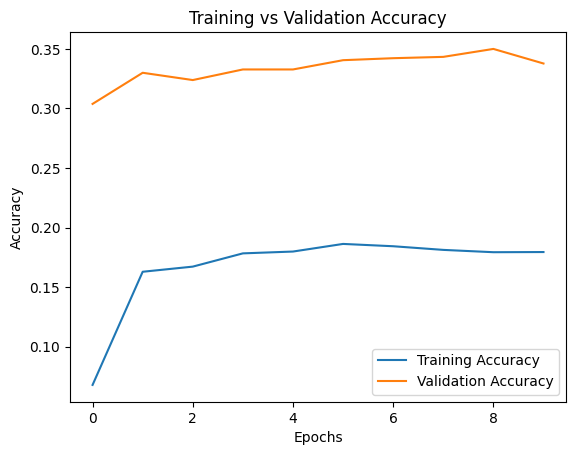

In [69]:
# Plot training history
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()